# Linear Regression Health Costs Calculator

In this challenge, you will predict healthcare costs using a regression algorithm.

You are given a dataset that contains information about different people including their healthcare costs. Use the data to predict healthcare costs based on new data.

In [ ]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv

In [ ]:
dataset = pd.read_csv('insurance.csv')
dataset.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [ ]:
# Convert categorical data to numbers
dataset["sex"].replace(
    ["female", "male"],
    [0, 1],
    inplace=True
)

dataset["smoker"].replace(
    ["no", "yes"],
    [0, 1],
    inplace=True
)

dataset["region"].replace(
    ['southwest', 'southeast', 'northwest', 'northeast'],
    [0, 1, 2, 3],
    inplace=True
)

dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,0,16884.92
1,18,1,33.8,1,0,1,1725.55
2,28,1,33.0,3,0,1,4449.46
3,33,1,22.7,0,0,2,21984.47
4,32,1,28.9,0,0,2,3866.86


In [ ]:
# Use 80% of the data as the train_dataset
# 20% of the data as the test_dataset.
test_dataset = dataset.sample(frac=0.2)
train_dataset = dataset[~dataset.isin(test_dataset)].dropna()

In [ ]:
# Pop off the "expenses" column from these datasets
train_labels = train_dataset.pop('expenses')
test_labels = test_dataset.pop('expenses')

In [ ]:
# Normalizing the train_dataset
normalizer = layers.experimental.preprocessing.Normalization()
normalizer.adapt(np.array(train_dataset))

In [ ]:
# Defining the model
model = keras.Sequential([
    normalizer,
    layers.Dense(16),
    layers.Dense(4),
    layers.Dropout(.2),
    layers.Dense(1),
])

# Compiling the model
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mae',
    metrics=['mae', 'mse']
)

In [ ]:
# Building the model
model.build()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normaliza  (None, 6)                 13        
 tion)                                                           
                                                                 
 dense_9 (Dense)             (None, 16)                112       
                                                                 
 dense_10 (Dense)            (None, 4)                 68        
                                                                 
 dropout_3 (Dropout)         (None, 4)                 0         
                                                                 
 dense_11 (Dense)            (None, 1)                 5         
                                                                 
Total params: 198 (796.00 Byte)
Trainable params: 185 (740.00 Byte)
Non-trainable params: 13 (56.00 Byte)
______________

In [ ]:
# Training the model
history = model.fit(
    train_dataset,
    train_labels,
    epochs=100,
)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 12621.7402 - mae: 12621.7402 - mse: 308954656.0000
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 6294.6069 - mae: 6294.6069 - mse: 114214248.0000
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 4564.3794 - mae: 4564.3794 - mse: 59262208.0000
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 4437.0903 - mae: 4437.0903 - mse: 58715868.0000
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 4470.6143 - mae: 4470.6143 - mse: 60340940.0000
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 4352.9111 - mae: 4352.9111 - mse: 55612992.0000
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 4348.9868 - mae: 4348.9868 - mse: 55031260.0000
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 4300.3208 - mae: 4300.3208 - mse: 54660512.0000
Epoch 9/100
34/34 [=========

9/9 - 0s - loss: 3392.3506 - mae: 3392.3506 - mse: 36506544.0000 - 149ms/epoch - 17ms/step
Testing set Mean Abs Error: 3392.35 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 2ms/step


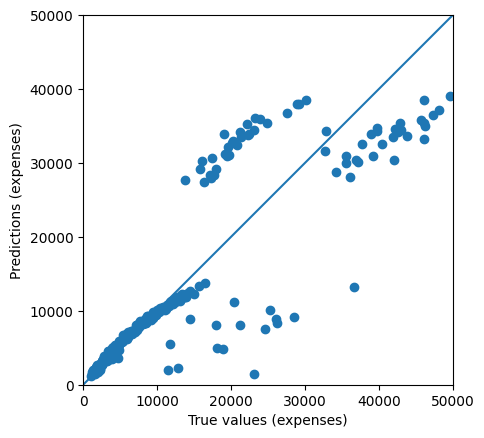

In [ ]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
